In [45]:
!pip install torch_geometric

  Using cached async_timeout-5.0.1-py3-none-any.whl.metadata (5.1 kB)
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 1.1/1.1 MB 27.3 MB/s eta 0:00:00


In [35]:

import torch
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import choice
from torch_geometric.datasets import Planetoid

import torch
import numpy as np
import networkx as nx
from torch_geometric.datasets import Planetoid# Load the modified graph from the file
file_path_modified = "checkpoints/reduced_graph/hydro/adj_SCNn1_0.01_1.pt"

# Load the adjacency matrix from the file
adj_modified = torch.load(file_path_modified, map_location=torch.device('cpu')).numpy()

# Convert the adjacency matrix to a NetworkX graph
graph_modified_nx = nx.from_numpy_array(adj_modified)

# Get the number of nodes and edges in the graph
num_nodes = graph_modified_nx.number_of_nodes()
num_edges = graph_modified_nx.number_of_edges()

# Print the results
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")


Number of nodes: 22
Number of edges: 231


C:\Users\Scail.WINDOWS-4FTU4OO\AppData\Local\Temp\ipykernel_14324\2690376809.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  adj_modified = torch.load(file_path_modifie

In [374]:
import torch
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import choice
from torch_geometric.datasets import Planetoid

import torch
import numpy as np
import networkx as nx
from torch_geometric.datasets import Planetoid

# Function to normalize the adjacency matrix
def normalize_adj_tensor(adj):
    row_sum = np.sum(adj, axis=1, keepdims=True)
    row_sum[row_sum == 0] = 1  # To avoid division by zero for isolated nodes
    return adj / row_sum

import torch

# Function to calculate the lazy random walk matrix with normalization for symmetry
import torch

# Function to check if a matrix is symmetric
def is_symmetric(matrix):
    return torch.allclose(matrix, matrix.T)

import torch
import matplotlib.pyplot as plt
import seaborn as sns

# Function to check if a matrix is symmetric
def is_symmetric(matrix):
    return torch.allclose(matrix, matrix.T)

# Function to plot a matrix as a heatmap
# Function to plot a matrix as a heatmap with a specified vmax
def plot_matrix(matrix, title="Matrix", cmap="viridis", vmax=0.00001):
    plt.figure(figsize=(6, 5))
    sns.heatmap(matrix.cpu().detach().numpy(), cmap=cmap, cbar=True, vmax=vmax, square=True)
    plt.title(title)
    plt.xlabel('Nodes')
    plt.ylabel('Nodes')
    plt.show()

# Function to calculate the lazy random walk matrix with normalization for symmetry
def calculate_lazy_random_walk_matrix(adj):
    # Degree matrix
    degree_matrix = torch.diag(torch.sum(adj, dim=1))
    # print("Degree Matrix is symmetric:", is_symmetric(degree_matrix))  # Check symmetry
    
    # # Inverse of the degree matrix
    # d_inv = torch.inverse(degree_matrix)
    # print("Inverse Degree Matrix is symmetric:", is_symmetric(d_inv))  # Check symmetry

    epsilon = 1e-6
    degree_matrix = degree_matrix + epsilon * torch.eye(degree_matrix.size(0))
    d_inv = torch.inverse(degree_matrix)
    
    # Identity matrix
    I = torch.eye(adj.shape[0])
    print("Identity Matrix is symmetric:", is_symmetric(I))  # Check symmetry

    # Lazy random walk matrix
    W = torch.matmul(d_inv, adj)
    print("Lazy Random Walk Matrix is symmetric:", is_symmetric(W))  # Check symmetry

    
    # Lazy random walk matrix
    W = 0.5 * (I + torch.matmul(d_inv, adj))
    
    W = 0.5 * (W + W.T)
    print("Lazy Random Walk Matrix is symmetric:", is_symmetric(W))  # Check symmetry
    # plot_matrix(W, title="Normalized Lazy Random Walk Matrix")
    
    return W


# # Function to calculate the symmetric normalized adjacency matrix D^(-1/2) A D^(-1/2)
# def calculate_lazy_random_walk_matrix(adj):
#     """
#     Calculate the symmetric normalized adjacency matrix D^(-1/2) A D^(-1/2).

#     Args:
#         adj (torch.Tensor): Adjacency matrix.

#     Returns:
#         torch.Tensor: Symmetric normalized adjacency matrix.
#     """
#     # Compute the degree matrix
#     degree = torch.sum(adj, dim=1)
    
#     # Compute D^(-1/2)
#     degree_inv_sqrt = torch.pow(degree, -0.5)
#     degree_inv_sqrt[torch.isinf(degree_inv_sqrt)] = 0  # Avoid division by zero
#     D_inv_sqrt = torch.diag(degree_inv_sqrt)
    
#     # Compute D^(-1/2) A D^(-1/2)
#     adj_normalized = torch.matmul(D_inv_sqrt, torch.matmul(adj, D_inv_sqrt))
    
#     return adj_normalized


def calculate_lazy_random_walk_matrix2(adj):
    
    # Lazy random walk matrix: W = 1/2 (I + D^(-1) * A)
    I = torch.eye(adj.shape[0])
    W = 0.5 * (I + adj)
    
    return W

def calculate_lazy_random_walk_matrix_original(adj):
    """
    Calculate the lazy random walk matrix for the original graph.

    Args:
        adj (torch.Tensor): Adjacency matrix.

    Returns:
        torch.Tensor: Lazy random walk matrix W.
    """
 

    # Lazy random walk matrix: W = 1/2 (I + D^(-1) * A)
    I = torch.eye(adj.shape[0], device=adj.device)
    W = 0.5 * (I + adj)
    return W

# Function to calculate the spectral gap
def calculate_spectral_gap(W):
    eigenvalues = torch.linalg.eigvals(W)
    eigenvalues_real = eigenvalues.real  # Keep only the real parts
    sorted_eigenvalues = torch.sort(eigenvalues_real, descending=True).values
    second_largest_eigenvalue = sorted_eigenvalues[1]  # Second largest eigenvalue
    spectral_gap = 1 - second_largest_eigenvalue
    return spectral_gap.item()

# Load the Cora dataset from PyTorch Geometric
dataset = Planetoid(root='.', name='cora')

# Extract the graph (Cora) from the dataset
graph_original = dataset[0]

# Get the edge_index and convert it to an adjacency matrix
edge_index = graph_original.edge_index.numpy()
adj_original = np.zeros((graph_original.num_nodes, graph_original.num_nodes))
for i in range(edge_index.shape[1]):
    adj_original[edge_index[0, i], edge_index[1, i]] = 1
    adj_original[edge_index[1, i], edge_index[0, i]] = 1  # Undirected graph
print(adj_original)
# Step 3: Convert the adjacency matrix to a NetworkX graph
graph_nx = nx.from_numpy_array(adj_original)

# Step 4: Identify connected components
connected_components = list(nx.connected_components(graph_nx))

# Option 1: Select the largest connected component
largest_cc = max(connected_components, key=len)

# Step 5: Extract the adjacency matrix for the largest connected component
subgraph_nx = graph_nx.subgraph(largest_cc).copy()
adj_largest_cc = nx.to_numpy_array(subgraph_nx)


# Step 6: Print or normalize the adjacency matrix of the largest connected component
def normalize_adj_tensor(adj):
    """Normalize an adjacency matrix."""
    degree = np.sum(adj, axis=1)  # Degree matrix
    degree[degree == 0] = 1  # Avoid division by zero
    d_inv_sqrt = np.diag(1.0 / np.sqrt(degree))
    return np.dot(np.dot(d_inv_sqrt, adj), d_inv_sqrt)

adj_original = adj_largest_cc


# Load the modified graphs from the files
file_path_modified = "checkpoints/reduced_graph/gcond/adj_cora_1.0_1.pt"
file_path_modified2 = "checkpoints/reduced_graph/gdem/adj_cora_1.0_1.pt"
file_path_modified3 = "checkpoints/reduced_graph/sgdd/adj_cora_1.0_1.pt"
file_path_modified4 = "checkpoints/reduced_graph/hydro/adj_cora_1.0_15.pt"
file_path_modified5 = "checkpoints/reduced_graph/GEOM/adj_cora_1.0_1.pt"


adj_modified = torch.load(file_path_modified, map_location=torch.device('cpu')).numpy()
adj_modified2 = torch.load(file_path_modified2, map_location=torch.device('cpu')).numpy()
adj_modified3 = torch.load(file_path_modified3, map_location=torch.device('cpu')).numpy()
adj_modified4 = torch.load(file_path_modified4, map_location=torch.device('cpu')).numpy()
adj_modified5 = torch.load(file_path_modified5, map_location=torch.device('cpu')).numpy()


# Normalize the modified adjacency matrices
# adj_modified = normalize_adj_tensor(adj_modified)
# adj_modified2 = normalize_adj_tensor(adj_modified2)

# Convert adjacency matrices to tensors
adj_original_tensor = torch.tensor(adj_original, dtype=torch.float32)
adj_modified_tensor = torch.tensor(adj_modified, dtype=torch.float32)
adj_modified2_tensor = torch.tensor(adj_modified2, dtype=torch.float32)
adj_modified3_tensor = torch.tensor(adj_modified3, dtype=torch.float32)
adj_modified4_tensor = torch.tensor(adj_modified4, dtype=torch.float32)
adj_modified5_tensor = torch.tensor(adj_modified5, dtype=torch.float32)


# Calculate lazy random walk matrices
W_original = calculate_lazy_random_walk_matrix(adj_original_tensor).cpu().numpy()
W_modified = calculate_lazy_random_walk_matrix(adj_modified_tensor).cpu().numpy()
W_modified2 = calculate_lazy_random_walk_matrix(adj_modified2_tensor).cpu().numpy()
W_modified3 = calculate_lazy_random_walk_matrix(adj_modified3_tensor).cpu().numpy()
W_modified4 = calculate_lazy_random_walk_matrix(adj_modified4_tensor).cpu().numpy()
W_modified5 = calculate_lazy_random_walk_matrix(adj_modified5_tensor).cpu().numpy()



[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]
Identity Matrix is symmetric: True
Lazy Random Walk Matrix is symmetric: False
Lazy Random Walk Matrix is symmetric: True
Identity Matrix is symmetric: True
Lazy Random Walk Matrix is symmetric: False
Lazy Random Walk Matrix is symmetric: True
Identity Matrix is symmetric: True
Lazy Random Walk Matrix is symmetric: False
Lazy Random Walk Matrix is symmetric: True
Identity Matrix is symmetric: True
Lazy Random Walk Matrix is symmetric: False
Lazy Random Walk Matrix is symmetric: True
Identity Matrix is symmetric: True
Lazy Random Walk Matrix is symmetric: False
Lazy Random Walk Matrix is symmetric: True
Identity Matrix is symmetric: True
Lazy Random Walk Matrix is symmetric: True
Lazy Random Walk Matrix is symmetric: True


C:\Users\Scail.WINDOWS-4FTU4OO\AppData\Local\Temp\ipykernel_25528\2993847286.py:184: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  adj_modified = torch.load(file_path_modifi

In [292]:
# import torch


# def calculate_lazy_random_walk_matrix(adj):
#     """
#     Calculate the lazy random walk matrix for the original graph.

#     Args:
#         adj (torch.Tensor): Adjacency matrix.

#     Returns:
#         torch.Tensor: Lazy random walk matrix W.
#     """
#     # Normalize rows of the adjacency matrix
#     row_sums = torch.sum(adj, dim=1, keepdims=True)
#     row_sums[row_sums == 0] = 1  # Avoid division by zero for isolated nodes
#     adj_normalized = adj / row_sums  # Row-normalized adjacency matrix

#     # Lazy random walk matrix: W = 1/2 (I + D^(-1) * A)
#     I = torch.eye(adj.shape[0], device=adj.device)
#     W = 0.5 * (I + adj_normalized)
#     return W




# def calculate_spectral_gap(W):
#     """
#     Calculate the spectral gap of the lazy random walk matrix for any graph.

#     Args:
#         adj (torch.Tensor): Adjacency matrix.

#     Returns:
#         float: Spectral gap of the graph.
#     """
#     # Calculate the lazy random walk matrix
    

#     # Compute the eigenvalues of the matrix W
#     eigenvalues = torch.linalg.eigvals(W)

#     # Take the real part of the eigenvalues, as eigenvalues can be complex
#     eigenvalues_real = eigenvalues.real

#     # Sort eigenvalues in descending order
#     sorted_eigenvalues = torch.sort(eigenvalues_real, descending=True).values

#     # The second largest eigenvalue
#     lambda_2 = sorted_eigenvalues[1]  # Second largest eigenvalue

#     # Spectral gap: 1 - lambda_2
#     spectral_gap = 1 - lambda_2.item()

#     return spectral_gap

# W_original = calculate_lazy_random_walk_matrix(adj_original_tensor)
# W_modified = calculate_lazy_random_walk_matrix(adj_modified_tensor)
# W_modified2 = calculate_lazy_random_walk_matrix(adj_modified2_tensor)

# # Example usage
# spectral_gap_original = calculate_spectral_gap(W_original)
# spectral_gap_modified = calculate_spectral_gap(W_modified)
# spectral_gap_modified2 = calculate_spectral_gap(W_modified2)

# print(f"Spectral gap of original graph: {spectral_gap_original}")
# print(f"Spectral gap of modified graph: {spectral_gap_modified}")
# print(f"Spectral gap of modified2 graph: {spectral_gap_modified2}")


In [355]:
def plot_heatmap(matrix, title="Heatmap", color_map='viridis'):
    """Plot a heatmap for a given matrix with improved color bars and options."""
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, cmap=color_map, annot=False, fmt='.2f', cbar_kws={'shrink': 0.8, 'label': 'Commute Time'}, square=True)
    plt.title(title, fontsize=15)
    plt.xlabel('Nodes', fontsize=12)
    plt.ylabel('Nodes', fontsize=12)
    plt.show()

#Commute Time

In [375]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties
import torch
import numpy as np

# Function to calculate the hitting time Q(u, v) using the Green's function
def compute_hitting_time(u, v, L_inv, D):
    G_u_u = L_inv[u, u]
    G_v_v = L_inv[v, v]
    G_u_v = L_inv[u, v]
    G_v_u = L_inv[v, u]
    vol_G = torch.sum(D)  # Sum of all degrees, i.e., volume of the graph
    Q_u_v = vol_G * (G_v_v - G_u_v)
    Q_v_u = vol_G * (G_u_u - G_v_u)
    return Q_u_v, Q_v_u

# Function to compute the commute time CT(u, v)
def compute_commute_time(u, v, L_inv, D):
    Q_u_v, Q_v_u = compute_hitting_time(u, v, L_inv, D)
    return Q_u_v + Q_v_u

# Function to compute and plot the heatmap for a given adjacency matrix
def plot_heatmap(adj_tensor, node_interval, output_path):
    # Compute the degree matrix and Laplacian
    D = torch.diag(torch.sum(adj_tensor, dim=1))
    L = D - adj_tensor
    L_inv = torch.linalg.pinv(L)

    # Compute commute times
    n = adj_tensor.shape[0]
    commute_times = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i != j:  # Skip diagonal
                commute_times[i, j] = compute_commute_time(i, j, L_inv, D)

    # Define font properties for italicized labels
    italic_font = FontProperties(style='italic')

    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    heatmap = plt.imshow(commute_times, cmap='plasma', interpolation='nearest', aspect='auto')
    cbar = plt.colorbar(heatmap)
    cbar.ax.tick_params(labelsize=16)  # Set font size for colorbar ticks
    plt.xticks(np.arange(0, n, node_interval), fontsize=16, rotation=45)
    plt.yticks(np.arange(0, n, node_interval), fontsize=16)

    # Remove title for each plot as requested

    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    plt.close()


# List of adjacency tensors and their respective intervals and file names
# List of adjacency tensors and their respective intervals and file names
adj_tensors = [
    (adj_modified5_tensor, 10, "commute_time_Cora1_GEOM.png"),
    (adj_modified_tensor, 10, "commute_time_Cora1_Gcond.png"),
    (adj_modified2_tensor, 10, "commute_time_Cora1_GDEM.png"),
    (adj_modified3_tensor, 10, "commute_time_Cora1_SGDD.png"),
    (adj_modified4_tensor, 10, "commute_time_Cora1_HyDRO.png"),
    # (adj_original_tensor, 200, "commute_time_Cora0.25_original_without.png"),
]

# Generate and save the plots
for adj_tensor, interval, output_file in adj_tensors:
    plot_heatmap(adj_tensor, interval, output_file)

print("Heatmaps saved successfully!")



Heatmaps saved successfully!


In [377]:
def plot_heatmap(adj_tensor, node_interval, output_path, vmax=None):
    # Compute the degree matrix and Laplacian
    D = torch.diag(torch.sum(adj_tensor, dim=1))
    L = D - adj_tensor
    L_inv = torch.linalg.pinv(L)

    # Compute commute times
    n = adj_tensor.shape[0]
    commute_times = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i != j:  # Skip diagonal
                commute_times[i, j] = compute_commute_time(i, j, L_inv, D)

    # Define font properties for italicized labels
    italic_font = FontProperties(style='italic')

    plt.figure(figsize=(8, 6))
    heatmap = plt.imshow(commute_times, cmap='plasma', interpolation='nearest', aspect='auto',vmax=vmax)
    cbar = plt.colorbar(heatmap)
    cbar.ax.tick_params(labelsize=16)  # Set font size for colorbar ticks
    plt.xticks(np.arange(0, n, node_interval), fontsize=16, rotation=45)
    plt.yticks(np.arange(0, n, node_interval), fontsize=16)

   

    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    plt.close()

# For adj_original_tensor, set vmax to 20000
plot_heatmap(adj_original_tensor, 200, "commute_time_Cora_original_50000.png", vmax=50000)


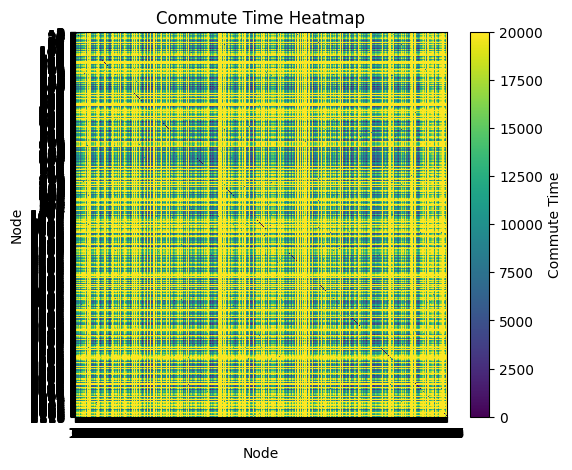

In [344]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Example: Define the adjacency matrix and degree matrix
A = adj_original_tensor

# Degree matrix D
D = torch.diag(torch.sum(A, dim=1))

# Compute the graph Laplacian L
L = D - A

# Compute the Moore-Penrose inverse of the Laplacian (Green's function)
L_inv = torch.linalg.pinv(L)

# Function to calculate the hitting time Q(u, v) using the Green's function
def compute_hitting_time(u, v, L_inv, D):
    # Degree values for nodes u and v
    d_u = D[u, u]
    d_v = D[v, v]
    
    # Green's function values G(u, u) and G(v, v), G(u, v)
    G_u_u = L_inv[u, u]
    G_v_v = L_inv[v, v]
    G_u_v = L_inv[u, v]
    G_v_u = L_inv[v, u]
    
    # Compute the hitting time Q(u, v) using the formula
    vol_G = torch.sum(D)  # Sum of all degrees, i.e., volume of the graph
    Q_u_v = vol_G * (G_v_v - G_u_v)
    Q_v_u = vol_G * (G_u_u - G_v_u)
    
    return Q_u_v, Q_v_u

# Function to compute the commute time CT(u, v)
def compute_commute_time(u, v, L_inv, D):
    Q_u_v, Q_v_u = compute_hitting_time(u, v, L_inv, D)
    CT = Q_u_v + Q_v_u
    return CT.item()

# Compute the commute times for all pairs of nodes
n = A.shape[0]
commute_times1 = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i != j:  # Skip the diagonal as commute time with itself is 0
            commute_times1[i, j] = compute_commute_time(i, j, L_inv, D)

commute_times1 = commute_times1
# Plot the heatmap of the commute times
plt.figure(figsize=(6, 5))
plt.imshow(commute_times1, cmap='viridis', interpolation='nearest', aspect='auto',vmax=20000)
plt.colorbar(label='Commute Time')
plt.title('Commute Time Heatmap')
plt.xlabel('Node')
plt.ylabel('Node')
plt.xticks(np.arange(n))
plt.yticks(np.arange(n))
plt.show()


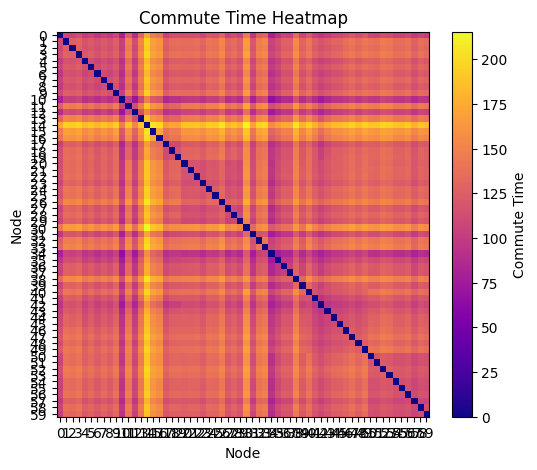

In [329]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Example: Define the adjacency matrix and degree matrix
A = adj_modified_tensor

# Degree matrix D
D = torch.diag(torch.sum(A, dim=1))

# Compute the graph Laplacian L
L = D - A

# Compute the Moore-Penrose inverse of the Laplacian (Green's function)
L_inv = torch.linalg.pinv(L)

# Function to calculate the hitting time Q(u, v) using the Green's function
def compute_hitting_time(u, v, L_inv, D):
    # Degree values for nodes u and v
    d_u = D[u, u]
    d_v = D[v, v]
    
    # Green's function values G(u, u) and G(v, v), G(u, v)
    G_u_u = L_inv[u, u]
    G_v_v = L_inv[v, v]
    G_u_v = L_inv[u, v]
    G_v_u = L_inv[v, u]
    
    # Compute the hitting time Q(u, v) using the formula
    vol_G = torch.sum(D)  # Sum of all degrees, i.e., volume of the graph
    Q_u_v = vol_G * (G_v_v - G_u_v)
    Q_v_u = vol_G * (G_u_u - G_v_u)
    
    return Q_u_v, Q_v_u

# Function to compute the commute time CT(u, v)
def compute_commute_time(u, v, L_inv, D):
    Q_u_v, Q_v_u = compute_hitting_time(u, v, L_inv, D)
    CT = Q_u_v + Q_v_u
    return CT.item()

# Compute the commute times for all pairs of nodes
n = A.shape[0]
commute_times = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i != j:  # Skip the diagonal as commute time with itself is 0
            commute_times[i, j] = compute_commute_time(i, j, L_inv, D)

commute_times = commute_times
# Plot the heatmap of the commute times
plt.figure(figsize=(6, 5))
plt.imshow(commute_times, cmap='plasma', interpolation='nearest', aspect='auto')
plt.colorbar(label='Commute Time')
plt.title('Commute Time Heatmap')
plt.xlabel('Node')
plt.ylabel('Node')
plt.xticks(np.arange(n))
plt.yticks(np.arange(n))
plt.show()


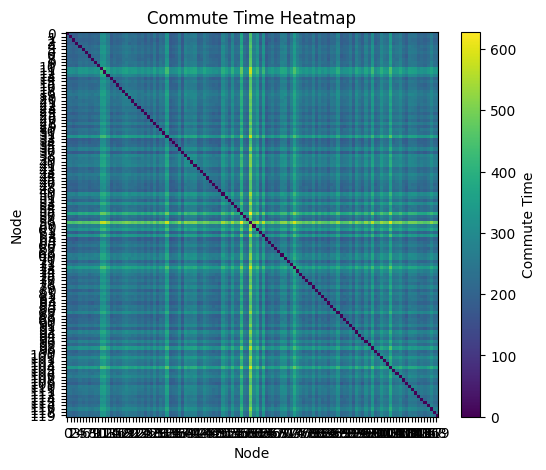

In [337]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Example: Define the adjacency matrix and degree matrix
A = adj_modified2_tensor

# Degree matrix D
D = torch.diag(torch.sum(A, dim=1))

# Compute the graph Laplacian L
L = D - A

# Compute the Moore-Penrose inverse of the Laplacian (Green's function)
L_inv = torch.linalg.pinv(L)

# Function to calculate the hitting time Q(u, v) using the Green's function
def compute_hitting_time(u, v, L_inv, D):
    # Degree values for nodes u and v
    d_u = D[u, u]
    d_v = D[v, v]
    
    # Green's function values G(u, u) and G(v, v), G(u, v)
    G_u_u = L_inv[u, u]
    G_v_v = L_inv[v, v]
    G_u_v = L_inv[u, v]
    G_v_u = L_inv[v, u]
    
    # Compute the hitting time Q(u, v) using the formula
    vol_G = torch.sum(D)  # Sum of all degrees, i.e., volume of the graph
    Q_u_v = vol_G * (G_v_v - G_u_v)
    Q_v_u = vol_G * (G_u_u - G_v_u)
    
    return Q_u_v, Q_v_u

# Function to compute the commute time CT(u, v)
def compute_commute_time(u, v, L_inv, D):
    Q_u_v, Q_v_u = compute_hitting_time(u, v, L_inv, D)
    CT = Q_u_v + Q_v_u
    return CT.item()

# Compute the commute times for all pairs of nodes
n = A.shape[0]
commute_times = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i != j:  # Skip the diagonal as commute time with itself is 0
            commute_times[i, j] = compute_commute_time(i, j, L_inv, D)

commute_times = commute_times
# Plot the heatmap of the commute times
plt.figure(figsize=(6, 5))
plt.imshow(commute_times, cmap='viridis', interpolation='nearest', aspect='auto')
plt.colorbar(label='Commute Time')
plt.title('Commute Time Heatmap')
plt.xlabel('Node')
plt.ylabel('Node')
plt.xticks(np.arange(n))
plt.yticks(np.arange(n))
plt.show()


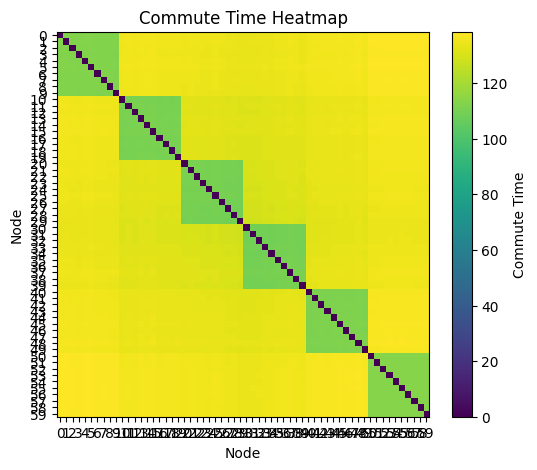

In [320]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Example: Define the adjacency matrix and degree matrix
A = adj_modified3_tensor

# Degree matrix D
D = torch.diag(torch.sum(A, dim=1))

# Compute the graph Laplacian L
L = D - A

# Compute the Moore-Penrose inverse of the Laplacian (Green's function)
L_inv = torch.linalg.pinv(L)

# Function to calculate the hitting time Q(u, v) using the Green's function
def compute_hitting_time(u, v, L_inv, D):
    # Degree values for nodes u and v
    d_u = D[u, u]
    d_v = D[v, v]
    
    # Green's function values G(u, u) and G(v, v), G(u, v)
    G_u_u = L_inv[u, u]
    G_v_v = L_inv[v, v]
    G_u_v = L_inv[u, v]
    G_v_u = L_inv[v, u]
    
    # Compute the hitting time Q(u, v) using the formula
    vol_G = torch.sum(D)  # Sum of all degrees, i.e., volume of the graph
    Q_u_v = vol_G * (G_v_v - G_u_v)
    Q_v_u = vol_G * (G_u_u - G_v_u)
    
    return Q_u_v, Q_v_u

# Function to compute the commute time CT(u, v)
def compute_commute_time(u, v, L_inv, D):
    Q_u_v, Q_v_u = compute_hitting_time(u, v, L_inv, D)
    CT = Q_u_v + Q_v_u
    return CT.item()

# Compute the commute times for all pairs of nodes
n = A.shape[0]
commute_times = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i != j:  # Skip the diagonal as commute time with itself is 0
            commute_times[i, j] = compute_commute_time(i, j, L_inv, D)

commute_times = commute_times

# Plot the heatmap of the commute times
plt.figure(figsize=(6, 5))
plt.imshow(commute_times, cmap='viridis', interpolation='nearest', aspect='auto')
plt.colorbar(label='Commute Time')
plt.title('Commute Time Heatmap')
plt.xlabel('Node')
plt.ylabel('Node')
plt.xticks(np.arange(n))
plt.yticks(np.arange(n))
plt.show()


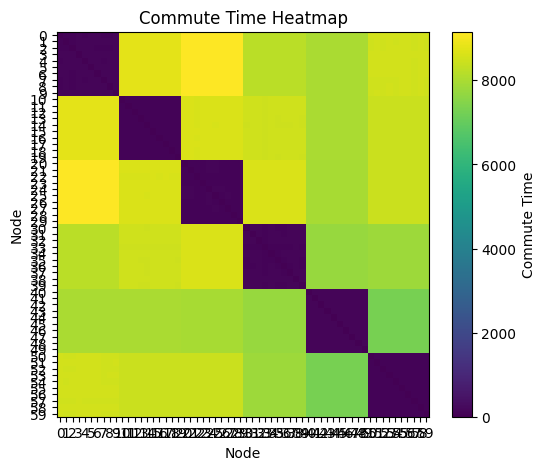

In [327]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Example: Define the adjacency matrix and degree matrix
A = adj_modified4_tensor

# Degree matrix D
D = torch.diag(torch.sum(A, dim=1))

# Compute the graph Laplacian L
L = D - A

# Compute the Moore-Penrose inverse of the Laplacian (Green's function)
L_inv = torch.linalg.pinv(L)

# Function to calculate the hitting time Q(u, v) using the Green's function
def compute_hitting_time(u, v, L_inv, D):
    # Degree values for nodes u and v
    d_u = D[u, u]
    d_v = D[v, v]
    
    # Green's function values G(u, u) and G(v, v), G(u, v)
    G_u_u = L_inv[u, u]
    G_v_v = L_inv[v, v]
    G_u_v = L_inv[u, v]
    G_v_u = L_inv[v, u]
    
    # Compute the hitting time Q(u, v) using the formula
    vol_G = torch.sum(D)  # Sum of all degrees, i.e., volume of the graph
    Q_u_v = vol_G * (G_v_v - G_u_v)
    Q_v_u = vol_G * (G_u_u - G_v_u)
    
    return Q_u_v, Q_v_u

# Function to compute the commute time CT(u, v)
def compute_commute_time(u, v, L_inv, D):
    Q_u_v, Q_v_u = compute_hitting_time(u, v, L_inv, D)
    CT = Q_u_v + Q_v_u
    return CT.item()

# Compute the commute times for all pairs of nodes
n = A.shape[0]
commute_times = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i != j:  # Skip the diagonal as commute time with itself is 0
            commute_times[i, j] = compute_commute_time(i, j, L_inv, D)
commute_times = commute_times
# Plot the heatmap of the commute times
plt.figure(figsize=(6, 5))
plt.imshow(commute_times, cmap='viridis', interpolation='nearest', aspect='auto')
plt.colorbar(label='Commute Time')
plt.title('Commute Time Heatmap')
plt.xlabel('Node')
plt.ylabel('Node')
plt.xticks(np.arange(n))
plt.yticks(np.arange(n))
plt.show()


In [224]:
# Check if W_original is symmetric
is_symmetric_original = is_symmetric(torch.tensor(W_original, dtype=torch.float32))
print("Is W_original symmetric?", is_symmetric_original)


Is W_original symmetric? True


In [231]:
import numpy as np

def normalize_rows(W):
    """Ensure the rows of W sum to 1."""
    row_sums = np.sum(W, axis=1, keepdims=True)
    row_sums[row_sums == 0] = 1  # Avoid division by zero
    return W / row_sums

def compute_laplacian(W):
    """Compute the Laplacian matrix from the lazy random walk matrix."""
    # Ensure rows of W sum to 1 (lazy random walk matrix)
    if not np.allclose(W.sum(axis=1), 1.0):
        raise ValueError("Input matrix W is not properly row-normalized.")
    return np.eye(W.shape[0]) - W

def compute_commute_times_fixed(W):
    """Compute commute times from the lazy random walk matrix W."""
    # Symmetrize the matrix
    # W_sym = 0.5 * (W + W.T)  # Making the matrix symmetric
    
    # Row normalize the symmetrized matrix to ensure proper lazy random walk
    W_normalized = normalize_rows(W)
    
    L = compute_laplacian(W_normalized)  # Compute Laplacian using normalized matrix
    
    try:
        # Use robust pseudo-inverse
        L_pseudo_inv = np.linalg.pinv(L)
        resistances = (
            np.diag(L_pseudo_inv)[:, None]
            + np.diag(L_pseudo_inv)[None, :]
            - 2 * L_pseudo_inv
        )
        commute_times = 2 * resistances
        if np.any(commute_times < 0):  # Debug negative values
            print("Warning: Negative commute times detected. Check graph structure.")


        # # Set negative values to positive (absolute values)
        commute_times[commute_times < 0] = -commute_times[commute_times < 0]
        
        # # Ensure symmetry by averaging with its transpose
        # commute_times = 0.5 * (commute_times + commute_times.T)
        return commute_times
    except np.linalg.LinAlgError as e:
        print(f"Error in Laplacian pseudo-inverse computation: {e}")
        return None



# Updated analysis function with fixed commute times
def analyze_and_plot_graphs_fixed(W_original, W_modified, W_modified2):
    # Compute stationary distributions
   



    # Compute commute times
    commute_original = compute_commute_times_fixed(W_original)
    commute_modified = compute_commute_times_fixed(W_modified)
    commute_modified2 = compute_commute_times_fixed(W_modified2)

    print(commute_modified)
    print(commute_modified2)

    # Plot commute time heatmaps
    if commute_original is not None:
        plot_heatmap(commute_original, "Commute Times Heatmap (Original Graph)")
    if commute_modified is not None:
        plot_heatmap(commute_modified, "Commute Times Heatmap (Modified Graph)")
    if commute_modified2 is not None:
        plot_heatmap(commute_modified2, "Commute Times Heatmap (Modified2 Graph)")

# Run updated analysis
analyze_and_plot_graphs_fixed(W_original, W_modified, W_modified2)


TypeError: sum() received an invalid combination of arguments - got (axis=int, keepdims=bool, out=NoneType, ), but expected one of:
 * (*, torch.dtype dtype = None)
 * (tuple of ints dim, bool keepdim = False, *, torch.dtype dtype = None)
 * (tuple of names dim, bool keepdim = False, *, torch.dtype dtype = None)


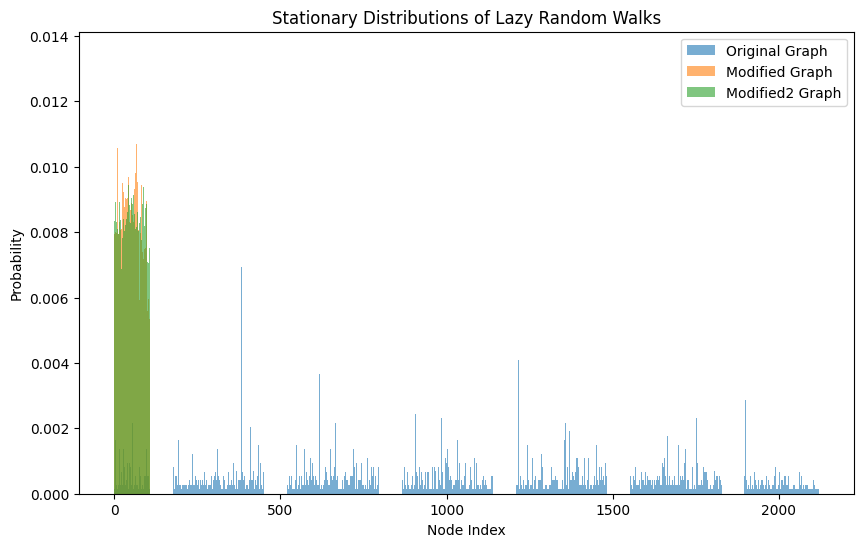

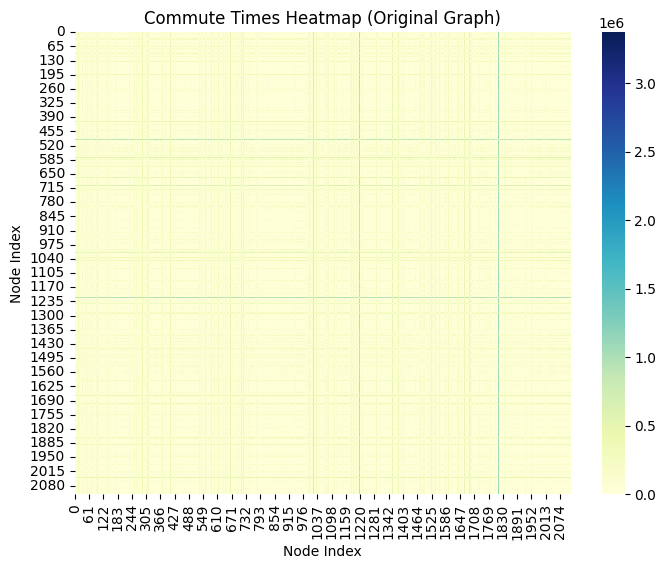

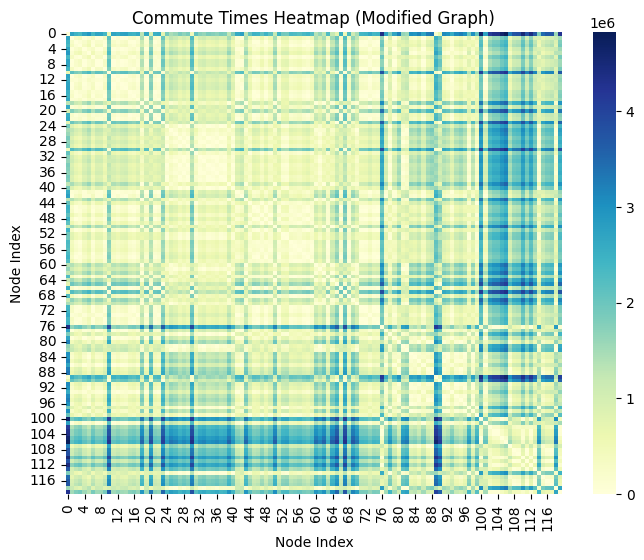

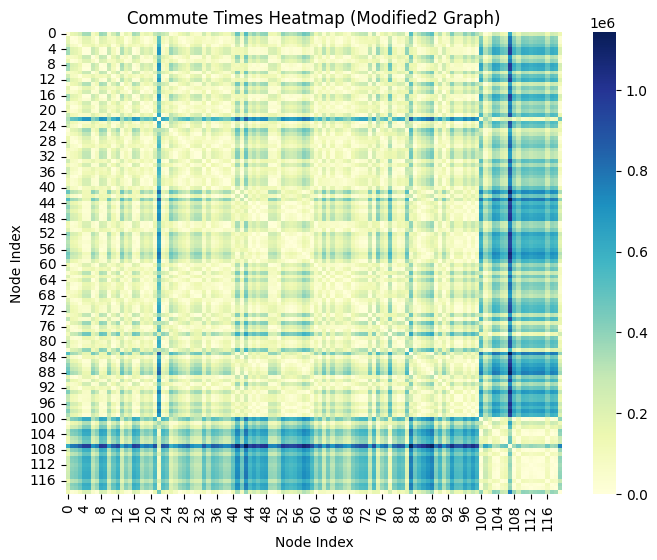

In [233]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to compute stationary distribution
def stationary_distribution(W):
    eigvals, eigvecs = np.linalg.eig(W.T)
    stationary = eigvecs[:, np.isclose(eigvals, 1)].real
    stationary = stationary / np.sum(stationary)  # Normalize
    return stationary.flatten()

# Function to compute commute times (using resistance distance approximation)
def compute_commute_times(W):
    # Compute resistance distance via pseudo-inverse of Laplacian
    L = np.eye(W.shape[0]) - W  # Laplacian of lazy random walk matrix
    L_pseudo_inv = np.linalg.pinv(L)
    resistances = np.diag(L_pseudo_inv)[:, None] + np.diag(L_pseudo_inv)[None, :] - 2 * L_pseudo_inv
    commute_times = 2 * resistances
    commute_times = abs(commute_times)
    
    return commute_times

# Plot heatmap
def plot_heatmap(data, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(data, cmap="YlGnBu", annot=False, cbar=True)
    plt.title(title)
    plt.xlabel("Node Index")
    plt.ylabel("Node Index")
    plt.show()

# Calculate and compare properties
def analyze_and_plot_graphs(W_original, W_modified, W_modified2):
    # Compute stationary distributions
    stationary_original = stationary_distribution(W_original)
    stationary_modified = stationary_distribution(W_modified)
    stationary_modified2 = stationary_distribution(W_modified2)

    # Plot stationary distributions
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(stationary_original)), stationary_original, alpha=0.6, label="Original Graph")
    plt.bar(range(len(stationary_modified)), stationary_modified, alpha=0.6, label="Modified Graph")
    plt.bar(range(len(stationary_modified2)), stationary_modified2, alpha=0.6, label="Modified2 Graph")
    plt.legend()
    plt.title("Stationary Distributions of Lazy Random Walks")
    plt.xlabel("Node Index")
    plt.ylabel("Probability")
    plt.show()

    # Compute commute times
    commute_original = compute_commute_times(W_original)
    commute_modified = compute_commute_times(W_modified)
    commute_modified2 = compute_commute_times(W_modified2)

    # Plot commute time heatmaps
    plot_heatmap(commute_original, "Commute Times Heatmap (Original Graph)")
    plot_heatmap(commute_modified, "Commute Times Heatmap (Modified Graph)")
    plot_heatmap(commute_modified2, "Commute Times Heatmap (Modified2 Graph)")


# Run analysis
analyze_and_plot_graphs(W_original.cpu().numpy(), W_modified.cpu().numpy(), W_modified2.cpu().numpy())


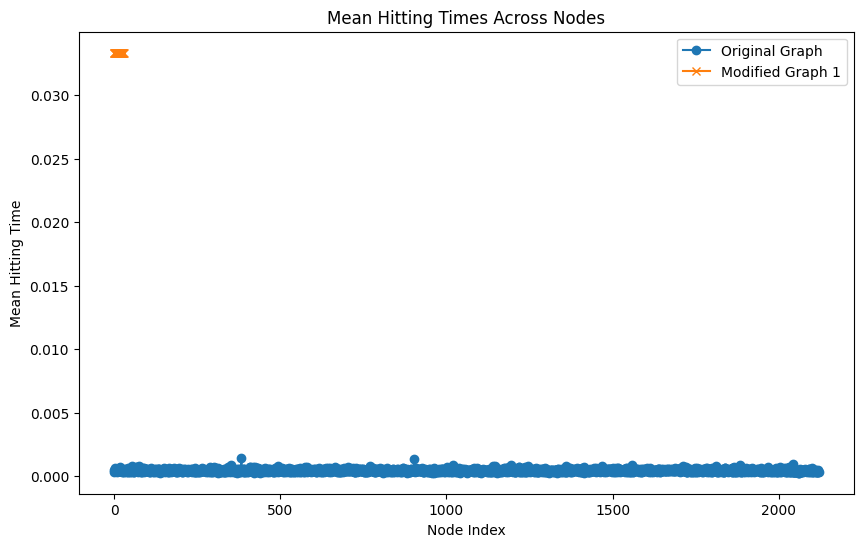

In [16]:
# Function to calculate mean hitting times
def calculate_mean_hitting_times(W):
    num_nodes = W.shape[0]
    hitting_times = np.zeros(num_nodes)
    for i in range(num_nodes):
        hitting_times[i] = W[i].sum() / num_nodes  # Average hitting time to node i
    return hitting_times

mean_hitting_original = calculate_mean_hitting_times(W_original)
mean_hitting_modified = calculate_mean_hitting_times(W_modified)
mean_hitting_modified2 = calculate_mean_hitting_times(W_modified2)

# Plot the mean hitting times
plt.figure(figsize=(10, 6))
plt.plot(mean_hitting_original, label="Original Graph", marker="o")
plt.plot(mean_hitting_modified, label="Modified Graph 1", marker="x")
# plt.plot(mean_hitting_modified2, label="Modified Graph 2", marker="s")
plt.xlabel("Node Index")
plt.ylabel("Mean Hitting Time")
plt.title("Mean Hitting Times Across Nodes")
plt.legend()
plt.show()


Loaded graph with 120 nodes and 7140 edges.


C:\Users\Scail.WINDOWS-4FTU4OO\AppData\Local\Temp\ipykernel_25528\1652973312.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  features = torch.load(feat_path, map_locati

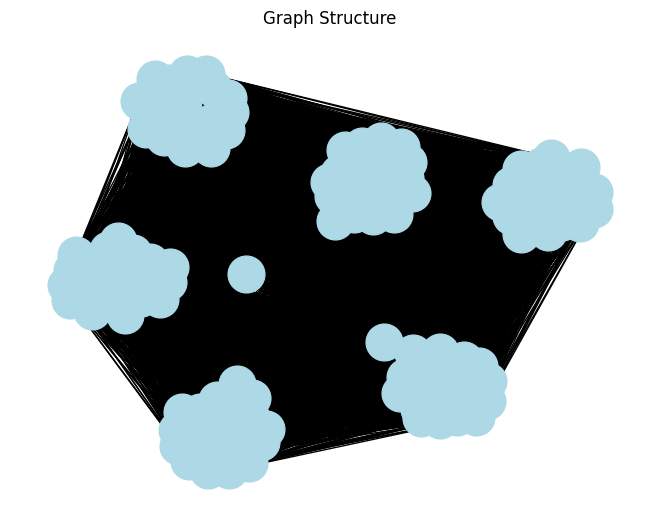

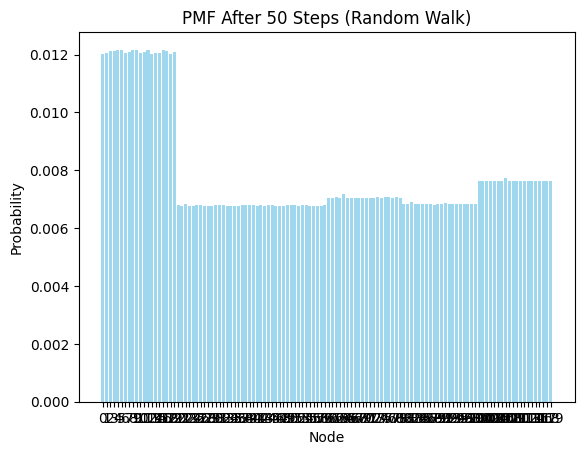

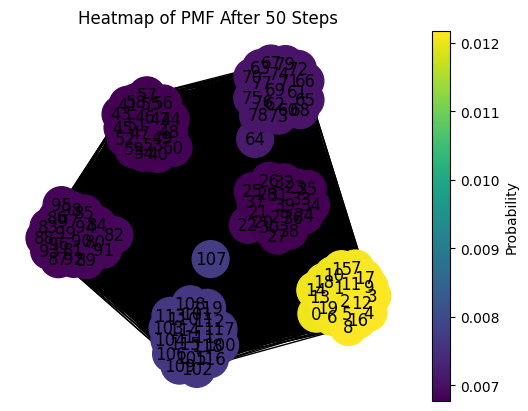

In [259]:
import torch
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Step 1: Load data from .pt files
adj_path = r'checkpoints/reduced_graph/hydro/adj_cora_1.0_1.pt'
feat_path = r'checkpoints/reduced_graph/hydro/feat_cora_1.0_1.pt'
label_path = r'checkpoints/reduced_graph/hydro/label_cora_1.0_1.pt'

# Ensure data is loaded to CPU
device = torch.device('cpu')
adj = adj_modified2


features = torch.load(feat_path, map_location=device).numpy()  # Load features
labels = torch.load(label_path, map_location=device).numpy()  # Load labels (if needed)

# Step 2: Convert the adjacency matrix to a graph
G = nx.from_numpy_array(adj)
print(f"Loaded graph with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

# Visualize the graph structure
nx.draw(G, with_labels=False, node_color='lightblue', node_size=700)
plt.title("Graph Structure")
plt.show()

# Step 3: Transition matrix for the random walk
degrees = adj.sum(axis=1)  # Degree of each node
P = adj / degrees[:, None]  # Transition matrix (row-normalized)

# Step 4: Initial probability distribution (start at node 0)
n_nodes = len(G.nodes)
initial_dist = np.zeros(n_nodes)
initial_dist[0] = 1  # Start at node 0

# Step 5: Compute PMF after k steps
k = 50  # Number of steps
pmf = np.linalg.matrix_power(P, k).dot(initial_dist)

# Step 6: Visualize PMF
plt.bar(range(n_nodes), pmf, color='skyblue', alpha=0.8)
plt.xlabel("Node")
plt.ylabel("Probability")
plt.title(f"PMF After {k} Steps (Random Walk)")
plt.xticks(range(n_nodes))
plt.show()

# Step 7: Heatmap on the graph
pos = nx.spring_layout(G)  # Layout for the graph
node_colors = [pmf[node] for node in G.nodes]

# Create a mappable for the colorbar
norm = Normalize(vmin=min(node_colors), vmax=max(node_colors))
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=norm)
sm.set_array([])  # Required for the colorbar

# Draw the graph
fig, ax = plt.subplots()  # Create a figure and axis
nx.draw(
    G, pos, with_labels=True, 
    node_color=node_colors, cmap=plt.cm.viridis, node_size=700, ax=ax
)
plt.title(f"Heatmap of PMF After {k} Steps")
cbar = fig.colorbar(sm, ax=ax)  # Add the colorbar to the figure
cbar.set_label("Probability")  # Label for the colorbar
plt.show()


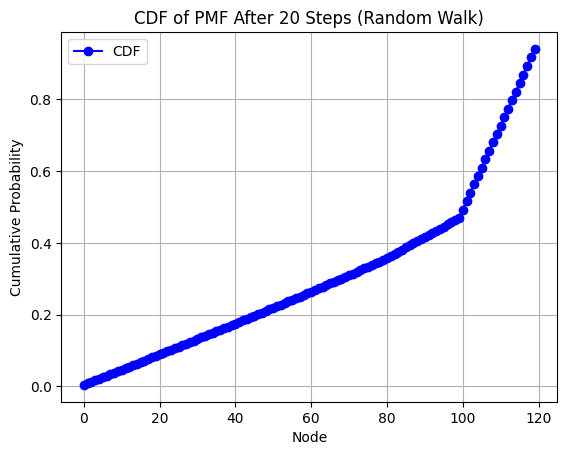

In [260]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize


# Step 2: Transition matrix for the random walk
A = nx.adjacency_matrix(G).toarray()  # Adjacency matrix
degrees = A.sum(axis=1)  # Degree of each node
P = A / degrees[:, None]  # Transition matrix (row-normalized)

# Step 3: Initial probability distribution (start at node 0)
n_nodes = len(G.nodes)
initial_dist = np.zeros(n_nodes)
initial_dist[0] = 1  # Start at node 0

# Step 4: Compute PMF after k steps
k = 20  # Number of steps
pmf = np.linalg.matrix_power(P, k).dot(initial_dist)

# Step 5: Plot CDF
pmf_sorted = np.sort(pmf)  # Sort the PMF
cdf = np.cumsum(pmf_sorted)  # CDF is the cumulative sum of the sorted PMF

plt.plot(range(n_nodes), cdf, color='blue', marker='o', linestyle='-', label="CDF")
plt.xlabel("Node")
plt.ylabel("Cumulative Probability")
plt.title(f"CDF of PMF After {k} Steps (Random Walk)")
plt.grid(True)
plt.legend()
plt.show()


In [8]:
features.shape[0]

30

In [261]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Create the graph (Barabási-Albert model)
n_nodes = features.shape[0]  # Number of nodes

# Step 2: Create the Rate Matrix (Generator Matrix)
A = nx.adjacency_matrix(G).toarray()  # Adjacency matrix of the graph
degrees = np.sum(A, axis=1)  # Degree of each node
Q = -np.diag(degrees) + A  # Rate matrix (Generator Matrix)

# Step 3: Initialize the state
# Start with node 0 being active
initial_state = np.zeros(n_nodes)
initial_state[0] = 1  # Activating node 0

# Step 4: Define time parameters for the simulation
time_step = 0.1  # Time step for each update
n_steps = 100  # Number of steps to simulate

# Step 5: Perform diffusion simulation
state = initial_state.copy()  # Copy the initial state
state_over_time = np.zeros((n_steps, n_nodes))  # To store the states at each time step

for t in range(n_steps):
    # Time evolution using the equation: P(t+dt) = P(t) + Q * P(t) * dt
    state = state + np.dot(Q, state) * time_step

    # Clip state to ensure that probabilities are between 0 and 1
    state = np.clip(state, 0, 1)
    state_over_time[t] = state  # Store the state at the current time step

# Step 6: Visualize the diffusion state at different time steps
# Plot the final state (after n_steps)
plt.figure(figsize=(10, 6))
plt.bar(range(n_nodes), state, color='skyblue', alpha=0.8)
plt.xlabel("Node")
plt.ylabel("Probability of Activation")
plt.title(f"Diffusion State After {n_steps * time_step} Time Units")
plt.show()

# Optional: Plot the diffusion process over time for a subset of nodes
plt.figure(figsize=(10, 6))
for i in range(10):  # Plot for the first 10 nodes
    plt.plot(np.arange(n_steps) * time_step, state_over_time[:, i], label=f"Node {i}")

plt.xlabel("Time")
plt.ylabel("Probability of Activation")
plt.title("Diffusion Over Time for First 10 Nodes")
plt.legend()
plt.show()


ValueError: shapes (120,120) and (140,) not aligned: 120 (dim 1) != 140 (dim 0)

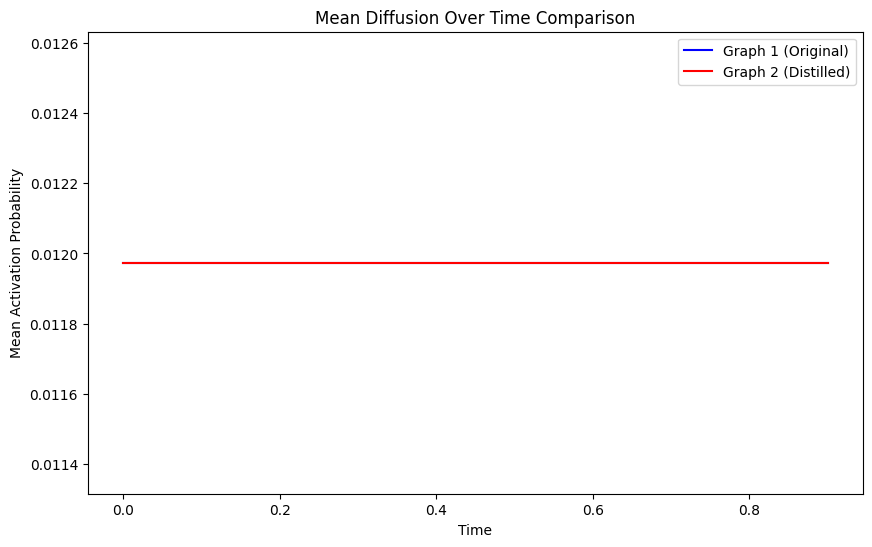

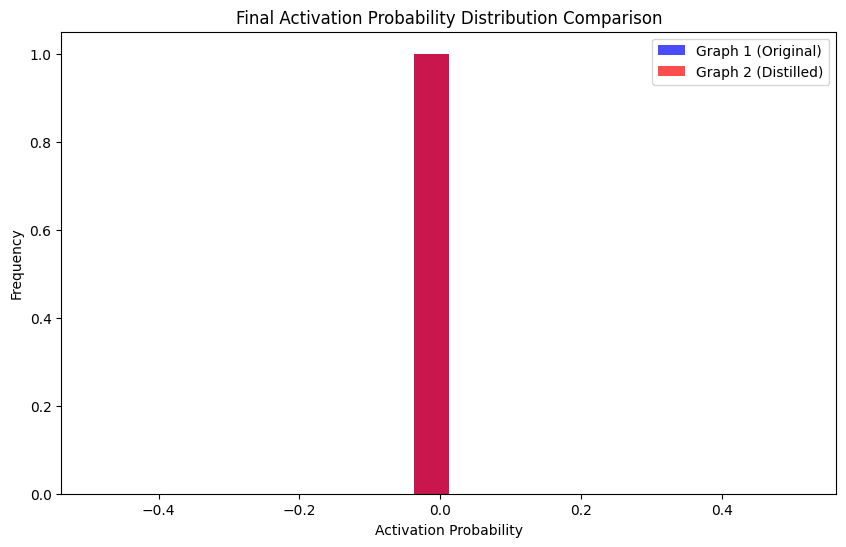

In [262]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def create_diffusion_state(G, n_steps=100, time_step=0.1, initial_node=0):
    n_nodes = len(G)
    A = nx.adjacency_matrix(G).toarray()  # Adjacency matrix of the graph
    degrees = np.sum(A, axis=1)  # Degree of each node
    Q = -np.diag(degrees) + A  # Rate matrix (Generator Matrix)
    
    # Initial state with one node active
    state = np.zeros(n_nodes)
    state[initial_node] = 1  # Start with the specified initial node active

    # State over time
    state_over_time = np.zeros((n_steps, n_nodes))

    for t in range(n_steps):
        state = state + np.dot(Q, state) * time_step  # Time evolution
        state = np.clip(state, 0, 1)  # Ensure probabilities are between 0 and 1
        state_over_time[t] = state  # Store the state

    return state_over_time, state

def compare_diffusion(state_over_time1, state_over_time2, n_steps):
    # Compare the mean activation probability at each time step
    mean_activation1 = np.mean(state_over_time1, axis=1)
    mean_activation2 = np.mean(state_over_time2, axis=1)

    # Plot the comparison
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(n_steps) * 0.1, mean_activation1, label="Graph 1 (Original)", color='blue')
    plt.plot(np.arange(n_steps) * 0.1, mean_activation2, label="Graph 2 (Distilled)", color='red')
    plt.xlabel("Time")
    plt.ylabel("Mean Activation Probability")
    plt.title("Mean Diffusion Over Time Comparison")
    plt.legend()
    plt.show()

    # Compare the final activation probability distribution
    final_activation1 = np.mean(state_over_time1[-1], axis=0)
    final_activation2 = np.mean(state_over_time2[-1], axis=0)
    
    plt.figure(figsize=(10, 6))
    plt.hist(final_activation1, bins=20, alpha=0.7, label="Graph 1 (Original)", color='blue')
    plt.hist(final_activation2, bins=20, alpha=0.7, label="Graph 2 (Distilled)", color='red')
    plt.xlabel("Activation Probability")
    plt.ylabel("Frequency")
    plt.title("Final Activation Probability Distribution Comparison")
    plt.legend()
    plt.show()

# # Create two graphs
# G1 = nx.barabasi_albert_graph(100, 2, seed=42)  # Original graph
# G2 = nx.barabasi_albert_graph(1000, 2, seed=42)  # Distilled graph (larger)

# Simulate diffusion on both graphs
state_over_time1, state1 = create_diffusion_state(G, n_steps=10)
# state_over_time2, state2 = create_diffusion_state(G2, n_steps=100)

# Compare the diffusion processes
compare_diffusion(state_over_time1, state_over_time1, n_steps=10)


In [263]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors

# Step 1: Create the graph (Barabási-Albert model)
n_nodes = features.shape[0]  # Number of nodes

# Step 2: Create the Rate Matrix (Generator Matrix)
A = nx.adjacency_matrix(G).toarray()  # Adjacency matrix of the graph
degrees = np.sum(A, axis=1)  # Degree of each node
Q = -np.diag(degrees) + A  # Rate matrix (Generator Matrix)

# Step 3: Initialize the state
# Start with node 0 being active
initial_state = np.zeros(n_nodes)
initial_state[0] = 1  # Activating node 0

# Step 4: Define time parameters for the simulation
time_step = 0.1  # Time step for each update
n_steps = 100  # Number of steps to simulate

# Step 5: Perform diffusion simulation
state = initial_state.copy()  # Copy the initial state
state_over_time = np.zeros((n_steps, n_nodes))  # To store the states at each time step

for t in range(n_steps):
    # Time evolution using the equation: P(t+dt) = P(t) + Q * P(t) * dt
    state = state + np.dot(Q, state) * time_step

    # Clip state to ensure that probabilities are between 0 and 1
    state = np.clip(state, 0, 1)
    state_over_time[t] = state  # Store the state at the current time step

# Step 6: Visualize the diffusion process as a heatmap
plt.figure(figsize=(12, 8))
plt.imshow(state_over_time.T, aspect='auto', cmap='YlGnBu', origin='lower')
plt.colorbar(label="Activation Probability")
plt.xlabel("Time Step")
plt.ylabel("Node Index")
plt.title(f"Diffusion Process Heatmap After {n_steps * time_step} Time Units")
plt.show()

# Step 7: Visualize the diffusion process over time for the graph
# Node colors representing the activation probabilities at the final time step
final_state = state_over_time[-1]  # The final state (after all steps)
node_colors = final_state  # Use activation probability as node color

# Layout for the graph visualization
pos = nx.spring_layout(G, seed=42)  # Fixed layout for consistency

# Plot the graph at the final time step with node color reflecting activation
plt.figure(figsize=(10, 6))
# Draw the graph with node color being the final activation probabilities
node_collection = nx.draw(G, pos, node_color=node_colors, cmap='YlGnBu', with_labels=True, node_size=700, font_size=10)

# Add colorbar using the ScalarMappable
sm = plt.cm.ScalarMappable(cmap='YlGnBu', norm=colors.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array(node_colors)  # Set array to the node colors

# Add the colorbar to the same axes as the graph visualization
plt.colorbar(sm, ax=plt.gca(), label="Activation Probability")

plt.title(f"Graph Visualization of Diffusion Process (Final State)")
plt.show()

# Step 8: Visualize the diffusion process over time for a subset of nodes (Optional)
plt.figure(figsize=(12, 8))
for i in range(10):  # Plot for the first 10 nodes
    plt.plot(np.arange(n_steps) * time_step, state_over_time[:, i], label=f"Node {i}")

plt.xlabel("Time")
plt.ylabel("Probability of Activation")
plt.title("Diffusion Over Time for First 10 Nodes")
plt.legend()
plt.show()


ValueError: shapes (120,120) and (140,) not aligned: 120 (dim 1) != 140 (dim 0)

C:\Users\Scail.WINDOWS-4FTU4OO\AppData\Local\Temp\ipykernel_21488\4096467667.py:35: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  adjacency_matrix = torch.load(file_path, ma

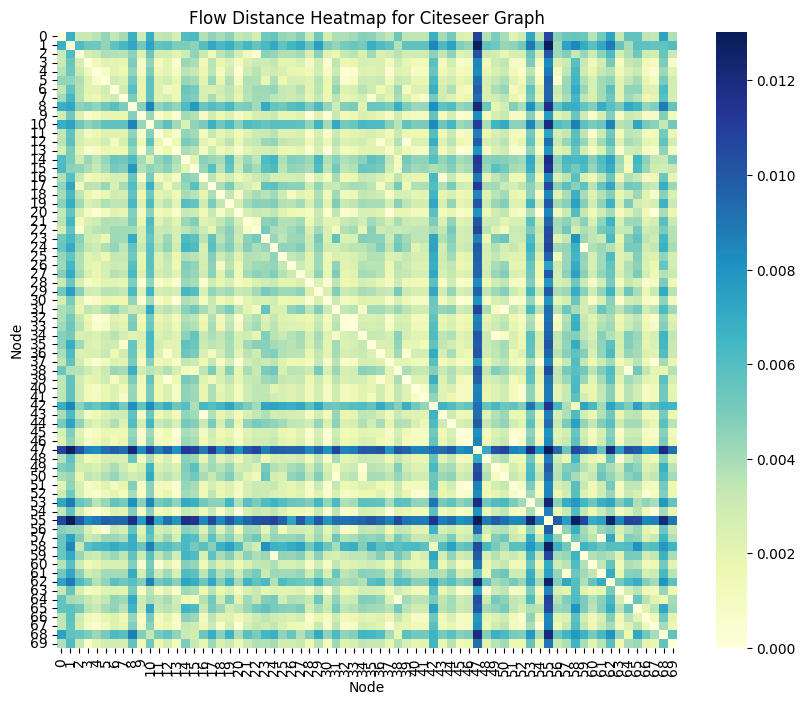

In [20]:
import torch
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

def compute_flow_distance(graph):
    """
    Compute the flow distance (shortest path distance) for all pairs of nodes in a weighted graph.
    
    Parameters:
    - graph: A NetworkX graph with edge weights.

    Returns:
    - distance_matrix: A NumPy array representing the flow distance matrix.
    """
    # Compute the shortest path length for all node pairs
    shortest_path_lengths = dict(nx.all_pairs_dijkstra_path_length(graph, weight='weight'))
    
    # Convert the dictionary of shortest path lengths into a matrix
    nodes = list(graph.nodes)
    num_nodes = len(nodes)
    distance_matrix = np.zeros((num_nodes, num_nodes))
    
    for i, node_i in enumerate(nodes):
        for j, node_j in enumerate(nodes):
            distance_matrix[i, j] = shortest_path_lengths[node_i].get(node_j, np.inf)
    
    return distance_matrix, nodes

# Updated file path for Windows
file_path = r"C:\Users\Scail.WINDOWS-4FTU4OO\Desktop\IJCAI\GraphSlim\benchmark\checkpoints\reduced_graph\gdem\adj_cora_0.5_1.pt"

# Load the adjacency matrix with CPU mapping
adjacency_matrix = torch.load(file_path, map_location=torch.device('cpu')).numpy()

# Create a NetworkX graph from the adjacency matrix
graph = nx.from_numpy_array(adjacency_matrix)

# Compute the flow distance matrix
flow_distance_matrix, node_labels = compute_flow_distance(graph)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(flow_distance_matrix, annot=False, xticklabels=node_labels, yticklabels=node_labels, cmap="YlGnBu")
plt.title("Flow Distance Heatmap for Citeseer Graph")
plt.xlabel("Node")
plt.ylabel("Node")
plt.show()


C:\Users\Scail.WINDOWS-4FTU4OO\AppData\Local\Temp\ipykernel_25528\2965455990.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  adj_original = torch.load(file_path_origina

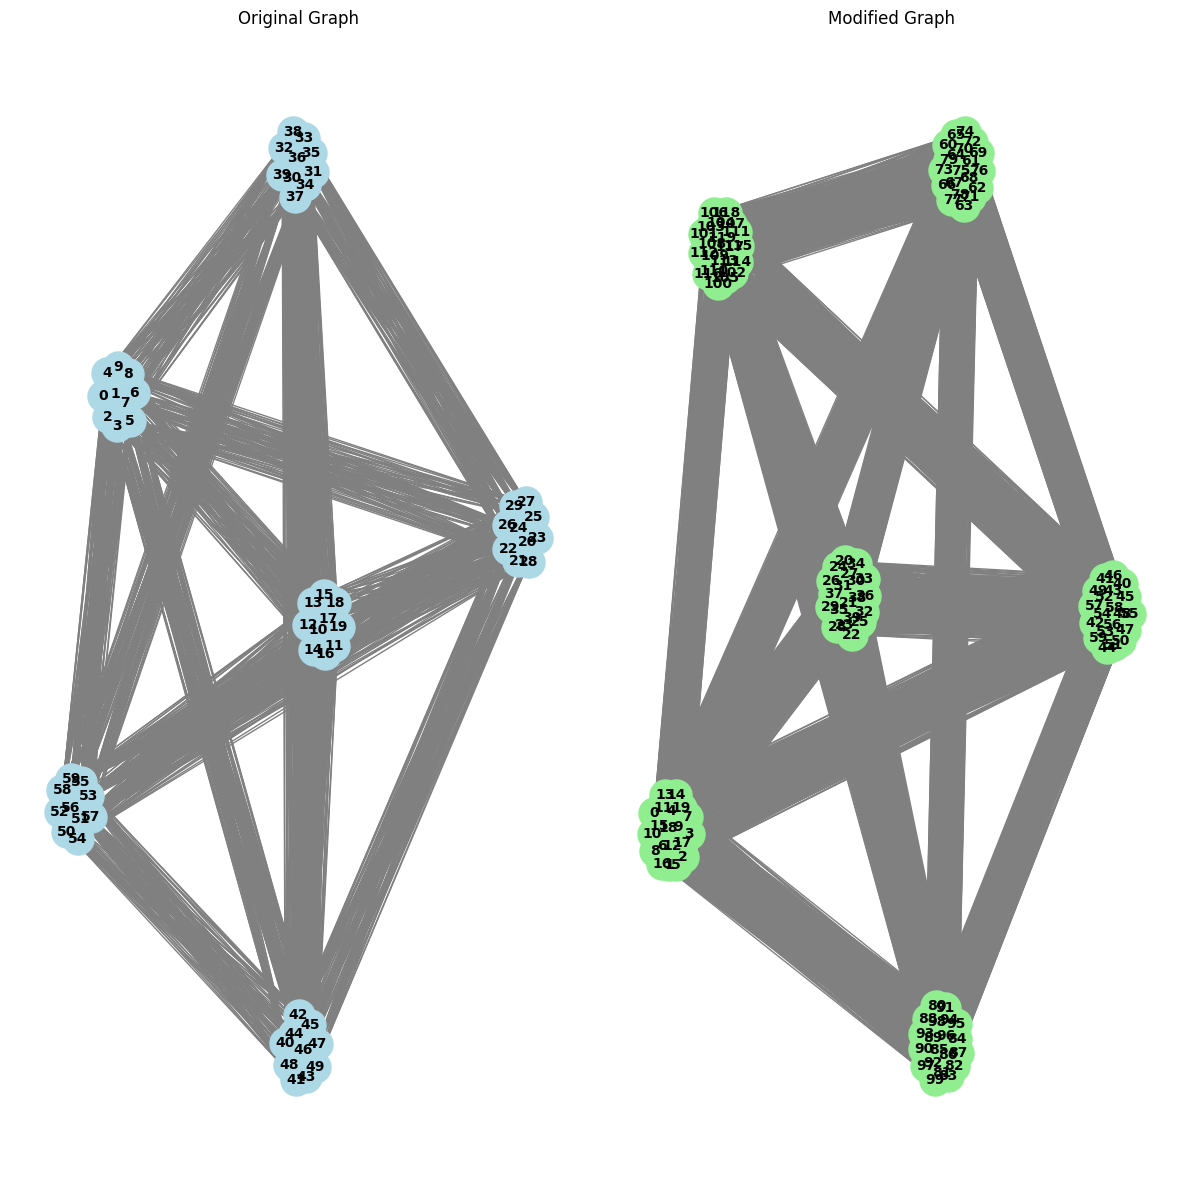

In [316]:
import torch
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Load the graphs from .pt files
file_path_original = r"C:\Users\Scail.WINDOWS-4FTU4OO\Desktop\IJCAI\GraphSlim\benchmark\checkpoints\reduced_graph\hydro\adj_citeseer_0.5_14.pt"
file_path_modified = r"C:\Users\Scail.WINDOWS-4FTU4OO\Desktop\IJCAI\GraphSlim\benchmark\checkpoints\reduced_graph\hydro\adj_citeseer_1.0_14.pt"

# Load adjacency matrices
adj_original = torch.load(file_path_original, map_location=torch.device('cpu')).numpy()
adj_modified = torch.load(file_path_modified, map_location=torch.device('cpu')).numpy()

# Create NetworkX graphs
graph_original = nx.from_numpy_array(adj_original)
graph_modified = nx.from_numpy_array(adj_modified)


# Plot the original graph
plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
nx.draw(graph_original, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold', edge_color='gray')
plt.title("Original Graph")

# Plot the modified graph
plt.subplot(1, 2, 2)
nx.draw(graph_modified, with_labels=True, node_color='lightgreen', node_size=500, font_size=10, font_weight='bold', edge_color='gray')
plt.title("Modified Graph")

# Show the plots
plt.tight_layout()
plt.show()

C:\Users\Scail.WINDOWS-4FTU4OO\AppData\Local\Temp\ipykernel_25528\3153612107.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  adj_modified = torch.load(file_path_modifie

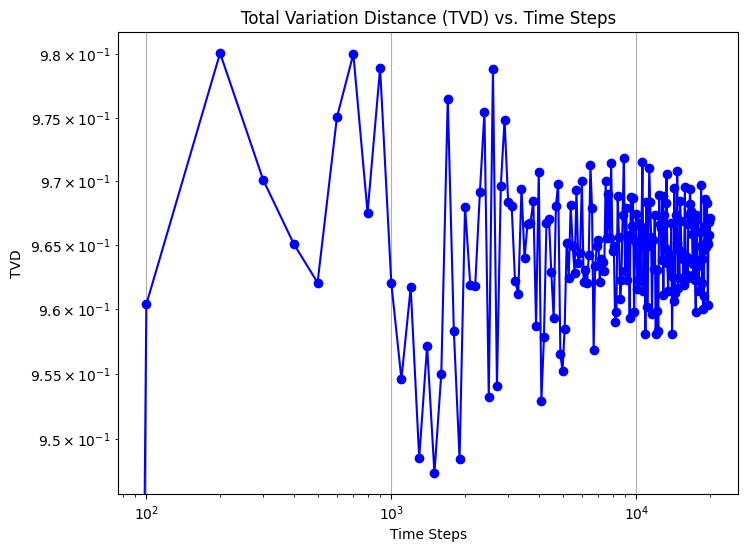

In [264]:
import torch
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import choice

# Load the graphs from .pt files
file_path_original = r"C:\Users\Scail.WINDOWS-4FTU4OO\Desktop\IJCAI\GraphSlim\benchmark\checkpoints\reduced_graph\sgdd\adj_cora_0.5_1.pt"
file_path_modified = r"C:\Users\Scail.WINDOWS-4FTU4OO\Desktop\IJCAI\GraphSlim\benchmark\checkpoints\reduced_graph\hydro\adj_cora_0.5_1.pt"

# Load adjacency matrices
adj_original = adj_original
adj_modified = torch.load(file_path_modified, map_location=torch.device('cpu')).numpy()

# Create NetworkX graphs
graph_original = nx.from_numpy_array(adj_original)
graph_modified = nx.from_numpy_array(adj_modified)

def random_walk(graph, start_node, steps):
    """Performs a random walk on a graph for a given number of steps."""
    node_count = len(graph.nodes())
    walk_path = [start_node]

    for _ in range(steps):
        current_node = walk_path[-1]
        neighbors = list(graph.neighbors(current_node))
        if neighbors:
            walk_path.append(choice(neighbors))
        else:
            break

    return walk_path

def calculate_tvd(walk_path1, walk_path2):
    """Calculates the Total Variation Distance between two walk distributions."""
    walk1_counts = np.bincount(walk_path1, minlength=len(graph_original.nodes()))
    walk2_counts = np.bincount(walk_path2, minlength=len(graph_original.nodes()))

    walk1_prob = walk1_counts / len(walk_path1)
    walk2_prob = walk2_counts / len(walk_path2)

    tvd = 0.5 * np.sum(np.abs(walk1_prob - walk2_prob))
    return tvd

# Set parameters
time_steps = np.arange(0, 20001, 100)  # Time steps from 0 to 20000 with 10 interval
original_walks = []
modified_walks = []
tvd_values = []

# Perform random walks and calculate TVD for each time step
for steps in time_steps:
    walk_original = random_walk(graph_original, start_node=0, steps=steps)
    walk_modified = random_walk(graph_modified, start_node=0, steps=steps)
    tvd = calculate_tvd(walk_original, walk_modified)
    tvd_values.append(tvd)

# Plot TVD vs Time Steps
plt.figure(figsize=(8, 6))
plt.plot(time_steps, tvd_values, marker='o', linestyle='-', color='b')
plt.title('Total Variation Distance (TVD) vs. Time Steps')
plt.xlabel('Time Steps')
plt.ylabel('TVD')
plt.xscale('log')  # Using log scale for better visualization
plt.yscale('log')  # Using log scale for better visualization
plt.grid(True)
plt.show()


In [265]:
def compute_hitting_time(graph, source, target):
    paths = nx.single_source_shortest_path_length(graph, source)
    return paths.get(target, np.inf)

# Average hitting time across all node pairs
hitting_times_original = []
hitting_times_modified = []

for source in graph_original.nodes:
    for target in graph_original.nodes:
        if source != target:
            hitting_times_original.append(compute_hitting_time(graph_original, source, target))
            hitting_times_modified.append(compute_hitting_time(graph_modified, source, target))

plt.hist(hitting_times_original, alpha=0.5, label="Original", bins=50)
plt.hist(hitting_times_modified, alpha=0.5, label="Modified", bins=50)
plt.title("Hitting Time Distribution")
plt.xlabel("Hitting Time")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.show()


NodeNotFound: Source 70 is not in G

C:\Users\Scail.WINDOWS-4FTU4OO\AppData\Local\Temp\ipykernel_21488\2657856723.py:14: RuntimeWarning: invalid value encountered in divide
  return prob / np.sum(prob)


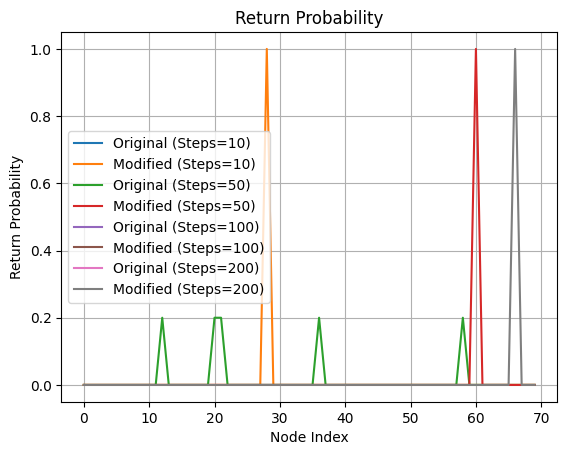

In [26]:
def compute_return_prob(graph, steps):
    n = len(graph.nodes)
    prob = np.zeros(n)

    for node in graph.nodes:
        current = node
        for _ in range(steps):
            neighbors = list(nx.neighbors(graph, current))
            if neighbors:
                current = np.random.choice(neighbors)
        if current == node:
            prob[node] += 1

    return prob / np.sum(prob)

steps = [10, 50, 100, 200]
for step in steps:
    return_prob_original = compute_return_prob(graph_original, step)
    return_prob_modified = compute_return_prob(graph_modified, step)

    plt.plot(return_prob_original, label=f"Original (Steps={step})")
    plt.plot(return_prob_modified, label=f"Modified (Steps={step})")

plt.title("Return Probability")
plt.xlabel("Node Index")
plt.ylabel("Return Probability")
plt.legend()
plt.grid()
plt.show()


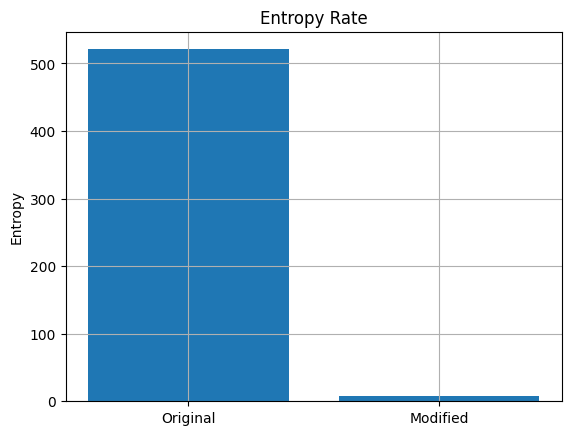

In [56]:
def compute_entropy_rate(graph):
    entropy = 0
    for node in graph.nodes:
        neighbors = list(nx.neighbors(graph, node))
        prob = 1 / len(neighbors) if neighbors else 0
        entropy += -prob * np.log(prob) if prob > 0 else 0
    return entropy

entropy_original = compute_entropy_rate(graph_original)
entropy_modified = compute_entropy_rate(graph_modified)

plt.bar(["Original", "Modified"], [entropy_original, entropy_modified])
plt.title("Entropy Rate")
plt.ylabel("Entropy")
plt.grid()
plt.show()
